## Dogs vs. Cats

In this project we build and compare classifiers to find out whether an image contains either a dog or a cat. 

Dataset: https://www.kaggle.com/c/dogs-vs-cats


#### Table of contents

- 1.0. Image Preprocessing
- 2.0. Train_Test_Split
- 3.0. Reshaping Data
- 4.0. Plotting Images
- 5.0. Normalizing Image Data
- 6.0. Creating Functions to conduct Analysis
- 7.0. Random Forest
    - 7.1. Model Accuracy
    - 7.2. Confusion Matrix
    - 7.3. Classification Report
    - 7.4. Variance Plot
- 8.0. Gradient Boosting
    - 8.1. Model Accuracy
    - 8.2. Confusion Matrix
    - 8.3. Classification Report
    - 8.4. Variance Plot
- 9.0. Convolutional Neural Networks
    - 9.1. Building a model
    - 9.2. Compiling the model
    - 9.3. Making predictions
    - 9.4. Confusion Matrix
    - 9.5. Classification Report

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import glob # is used to access content in folders 
import os # is used to create and remove directories
from PIL import Image # PIL for pillow used to minipulate,resize and modify images.
import tqdm # is used to create progress bars

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics


import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

import warnings
warnings.filterwarnings('ignore')

### 1.0. Image Preprocessing

In [3]:
#IMG_DIR = 'C:/Users/Instructor/Dropbox/Data Science/1.Temp_CODE FILES/Unit_5_TensorFlow and Keras/KERAS/cats-and-dogs/mix'
TRAIN_DIR = "C:/Users/Instructor/Downloads/CD/train"
IM_WIDTH = 128
IM_HEIGHT = 128

In [4]:
def read_images(directory, resize_to=(128, 128)):
    
    """This function extracts images from given
    directory"""
  
    files = glob.glob(directory + "/*.jpg")
    images = []
    labels = []
    for f in tqdm.tqdm_notebook(files):
        im = Image.open(f)
        im = im.resize(resize_to)
        im = np.array(im) / 255.0
        im = im.astype("float32")
        images.append(im)
       
        label = 1 if "dog" in f.lower() else 0
        labels.append(label)
       
    return np.array(images), np.array(labels)
 

In [5]:
X, y = read_images(directory=TRAIN_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))

HBox(children=(IntProgress(value=0, max=25000), HTML(value='')))

In [6]:
print('X:',X.shape)
print('y:',y.shape)

X: (25000, 128, 128, 3)
y: (25000,)


### 2.0. Train_Test_Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (17500, 128, 128, 3)
X_test: (7500, 128, 128, 3)


In [9]:
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

y_train: (17500,)
y_test: (7500,)


### 3.0. Reshaping Data

In [40]:
# Reshaping data
X1_train = X_train.reshape(17500, 3*128*128) 
X1_test  = X_test.reshape(7500, 3*128*128)

In [41]:
y1_train = y_train.ravel()
y1_test  = y_test.ravel()

In [42]:
print('X1_train:', X1_train.shape)
print('X1_test:', X1_test.shape)

X1_train: (17500, 49152)
X1_test: (7500, 49152)


In [43]:
print('y1_train:',y1_train.shape)
print('y1_test:',y1_test.shape)

y1_train: (17500,)
y1_test: (7500,)


### 4.0. Plotting Images

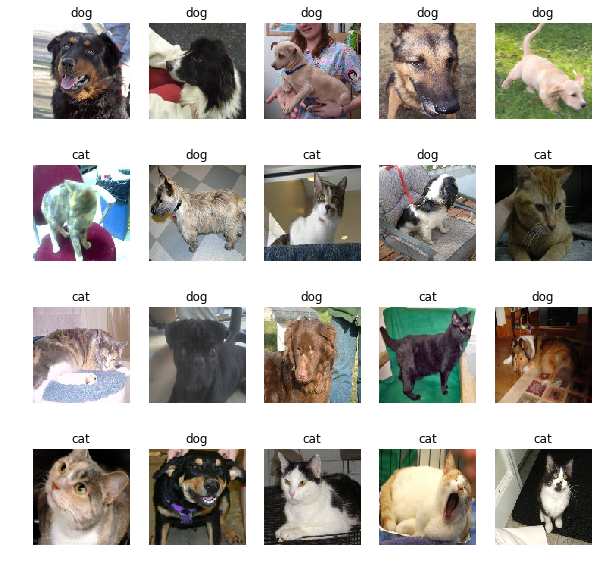

In [28]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(10,10))
 
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i])
        sp.set_title(labels[i])
    plt.show()
    
def regular_labels(labels):
    
    """This function changes binary values
    to categorical label names returning
    a numpy array"""
    
    return np.where(labels == 1, "dog", "cat")

plot_images(X_test[:20], regular_labels(y_test[:20]))    

### 5.0. Normalizing Image Data

In [47]:
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# We need to normalize first before we move to perform the PCA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X1_train = sc.fit_transform(X1_train)
X1_test  = sc.fit_transform(X1_test)

### 6.0. Creating Functions to conduct Analysis

In [48]:
def Accuracy(algorithm):
    
    # Train data
    y1_pred_train = algorithm.predict(X1_train)

    # Test data
    y1_pred_test = algorithm.predict(X1_test)

    print('\nR² Train Data:', algorithm.score(X1_train,y1_train))
    print('R² Test Data:', algorithm.score(X1_test,y1_test))

    # Predictions based on Test data
    print ('-------------------------------------------------')
    print ("Test Data:")
    print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y1_test, y1_pred_test)))
    print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y1_test, y1_pred_test)))
    print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))))

In [49]:
def conf_matrix(algorithm):
    
    y1_pred_test = algorithm.predict(X1_test)

    mat = confusion_matrix(y1_test, y1_pred_test)
    plt.figure(figsize=(5,5))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.title("CONFUSION MATRIX", fontsize=15)
    plt.xlabel('true label', fontsize=12)
    plt.ylabel('predicted label', fontsize=12);

In [90]:
def classification_report(algorithm):
    
    # Train data
    y1_pred_train = algorithm.predict(X1_train)

    # Test data
    y1_pred_test = algorithm.predict(X1_test)
    
    print('Classification Report Training Set\n', metrics.classification_report(y1_train, y1_pred_train))
    print('\nClassification Report Testing Set\n', metrics.classification_report(y1_test, y1_pred_test))

In [51]:
def plotting_variance(algorithm):
    
    """This function creates plots"""
    
    # Train data
    y1_pred_train = algorithm.predict(X1_train)

    # Test data
    y1_pred_test = algorithm.predict(X1_test)
    
    sns.set(style="whitegrid")

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.regplot(y1_train, y1_pred_train, color='green')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.xticks(rotation=0)
    plt.title('Training Data')

    # Test Data 
    plt.subplot(1,2,2)
    sns.regplot(y1_test, y1_pred_test, color='blue')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.xticks(rotation=0)
    plt.title('Test Data')

    plt.subplots_adjust(wspace= .5)
    plt.show()

### 7.0. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators=10, 
                                    max_depth=10, 
                                    max_features='auto')  

# You only fit the training data and not the test data
Random_Forest.fit(X1_train, y1_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### 7.1. Model Accuracy

In [27]:
Accuracy(Random_Forest)


R² Train Data: 0.8401142857142857
R² Test Data: 0.6208
-------------------------------------------------
Test Data:
Mean Absolute Error: 0.3792
Mean Squared Error: 0.3792
Root Mean Squared Error: 0.6157921727336261


#### 7.2. Confusion Matrix

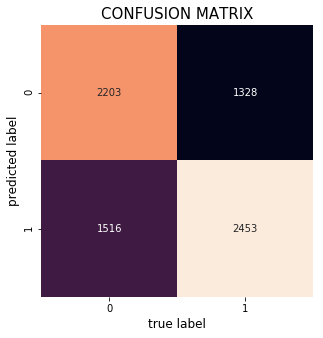

In [38]:
# 1 = dog, 0 = cat
conf_matrix(Random_Forest)

#### 7.3. Classification Report

In [39]:
classification_report(Random_Forest)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      8781
           1       0.80      0.90      0.85      8719

   micro avg       0.84      0.84      0.84     17500
   macro avg       0.84      0.84      0.84     17500
weighted avg       0.84      0.84      0.84     17500


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.62      0.59      0.61      3719
           1       0.62      0.65      0.63      3781

   micro avg       0.62      0.62      0.62      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.62      0.62      0.62      7500



#### 7.4. Variance Plot

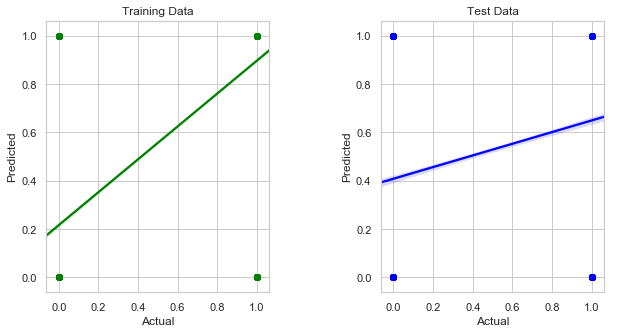

In [44]:
plotting_variance(Random_Forest)

### 8.0. Gradient Boosting

In [53]:
from sklearn import ensemble
Gradient_boost = ensemble.GradientBoostingClassifier(subsample=0.50, n_estimators=10, max_depth=10,loss='deviance')
Gradient_boost.fit(X1_train, y1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### 8.1. Model Accuracy

In [54]:
Accuracy(Gradient_boost)


R² Train Data: 0.8838857142857143
R² Test Data: 0.6081333333333333
-------------------------------------------------
Test Data:
Mean Absolute Error: 0.39186666666666664
Mean Squared Error: 0.39186666666666664
Root Mean Squared Error: 0.6259925452165278


#### 8.2. Confusion Matrix

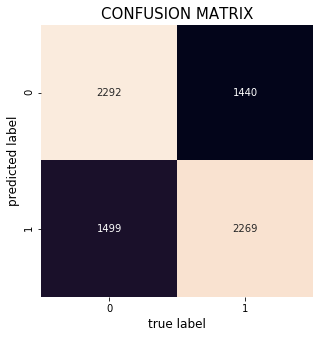

In [55]:
conf_matrix(Gradient_boost)

#### 8.3. Classification Report

In [56]:
classification_report(Gradient_boost)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      8709
           1       0.86      0.91      0.89      8791

   micro avg       0.88      0.88      0.88     17500
   macro avg       0.89      0.88      0.88     17500
weighted avg       0.88      0.88      0.88     17500


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      3791
           1       0.60      0.61      0.61      3709

   micro avg       0.61      0.61      0.61      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.61      0.61      0.61      7500



#### 8.4. Variance Plot

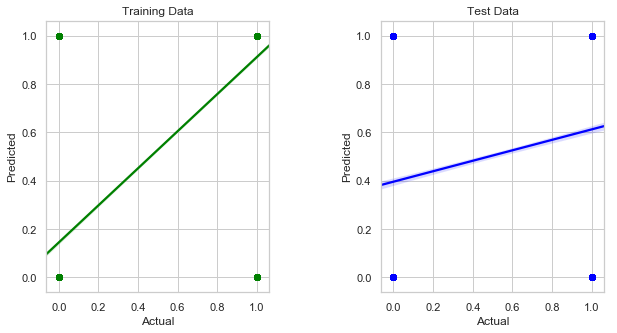

In [58]:
plotting_variance(Gradient_boost)

### 9.0. Convolutional Neural Networks

In [85]:
print(X.shape,X_train.shape,X_test.shape)

(25000, 128, 128, 3) (17500, 128, 128, 3) (7500, 128, 128, 3)


In [8]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (17500, 128, 128, 3)
X_test: (7500, 128, 128, 3)


In [9]:
print(y_train.shape)
print(y_test.shape)

(17500,)
(7500,)


In [86]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [87]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([8858, 8642], dtype=int64))
(array([0, 1]), array([3642, 3858], dtype=int64))


### 9.1. Building a model

In [70]:
model = Sequential()
num_classes = 2

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

# Second Convolutional layer          
model.add(Conv2D(32, (3, 3), activation='relu'))
          
# pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout drops a certain portion of our perceptrons in order to prevent overfitting.
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Full connection          
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
          
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total para

### 9.2. Compiling the model

In [71]:
# Compile the model to put it all together.
# model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
 - 427s - loss: 0.6758 - acc: 0.5686 - val_loss: 0.7048 - val_acc: 0.5352
Epoch 2/10
 - 420s - loss: 0.6372 - acc: 0.6333 - val_loss: 0.6266 - val_acc: 0.6447
Epoch 3/10
 - 420s - loss: 0.6108 - acc: 0.6628 - val_loss: 0.6360 - val_acc: 0.6339
Epoch 4/10
 - 421s - loss: 0.5855 - acc: 0.6850 - val_loss: 0.5955 - val_acc: 0.6757
Epoch 5/10
 - 420s - loss: 0.5627 - acc: 0.7070 - val_loss: 0.5689 - val_acc: 0.6957
Epoch 6/10
 - 420s - loss: 0.5448 - acc: 0.7186 - val_loss: 0.5505 - val_acc: 0.7168
Epoch 7/10
 - 420s - loss: 0.5240 - acc: 0.7393 - val_loss: 0.5410 - val_acc: 0.7185
Epoch 8/10
 - 446s - loss: 0.5061 - acc: 0.7542 - val_loss: 0.5272 - val_acc: 0.7321
Epoch 9/10
 - 460s - loss: 0.4836 - acc: 0.7673 - val_loss: 0.5120 - val_acc: 0.7457
Epoch 10/10
 - 436s - loss: 0.4609 - acc: 0.7862 - val_loss: 0.5347 - val_acc: 0.7244


In [73]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5347440750757854
Test accuracy: 0.7243999999682108


### 9.3. Making predictions

In [74]:
test_labels = y_test

In [75]:
test_labels

array([1, 0, 1, ..., 0, 1, 0])

In [76]:
predictions = model.predict(X_test)

In [77]:
predictions

array([[0.49952495, 0.50047505],
       [0.8698053 , 0.13019478],
       [0.5004869 , 0.49951306],
       ...,
       [0.9698103 , 0.03018968],
       [0.70643884, 0.29356113],
       [0.81412715, 0.18587291]], dtype=float32)

In [78]:
# Rounding the predictions
rounded_predictions = model.predict_classes(X_test)

In [79]:
rounded_predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
print(np.unique(rounded_predictions,return_counts=True))

(array([0, 1], dtype=int64), array([4797, 2703], dtype=int64))


### 9.4. Confusion Matrix

In [80]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [81]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3186  456]
 [1611 2247]]


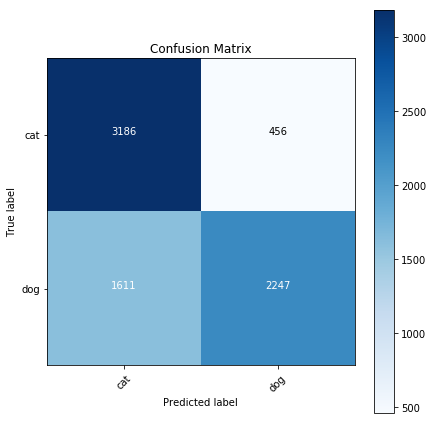

In [82]:
import itertools
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

### 9.5. Classification Report

In [95]:
print('Classification Report Training Set\n', metrics.classification_report(y_test, rounded_predictions ))

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.66      0.87      0.76      3642
           1       0.83      0.58      0.68      3858

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.75      0.73      0.72      7500
weighted avg       0.75      0.72      0.72      7500

